In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import tensorflow as tf

In [2]:
#Initial Data
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
del data['Date']
# Creating Dummy Variables for Qualitative Predictors
SpringList=[0]*len(data)
SummerList=[0]*len(data)
AutumnList=[0]*len(data)

Holiday = [0]*len(data)

FunctioningDay = [0]*len(data)

for i in range(len(data)):
    if(data['Holiday'][i]=='Holiday'):
        Holiday[i]=1
    if(data['Functioning Day'][i]== 'Yes'):
        FunctioningDay[i]=1
    if(data['Seasons'][i]=='Spring'):
        SpringList[i]=1
    elif(data['Seasons'][i]=='Summer'):
        SummerList[i]=1
    elif(data['Seasons'][i]=='Autumn'):
        AutumnList[i]=1
        
data['Seasons_Spring'] = SpringList
data['Seasons_Summer'] = SummerList
data['Seasons_Autumn'] = AutumnList
data['Holiday_Dummy'] = Holiday
data['FunctioningDay'] = FunctioningDay

del data['Seasons']
del data['Holiday']
del data['Functioning Day']


Bikes = copy.deepcopy(data)

median = data["Rented Bike Count"].median()

Median=[]
for bikes in data["Rented Bike Count"]:
    if (bikes>median):
        Median.append(1)
    else:
        Median.append(0)
        
Bikes["MedianBikes"] = Median


#Since Rented Bike Count and the Median Bikes are correlated we delete Count
del Bikes["Rented Bike Count"]
Bikes

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Autumn,Holiday_Dummy,FunctioningDay,MedianBikes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,1,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,1,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,1,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,1,1


In [246]:
X = Bikes.iloc[:,:-1].values
Y = Bikes.iloc[:, -1].values
#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.3,random_state=0)

In [247]:
# Applying Feature Scaling for Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #applying on all features
X_test = sc.transform(X_test)

In [26]:
#Building the model
start_time = time.time()
#Initializing the ANN
#initializing ann as sequence of layers
# sequence class belongs to keras library but new tensorflow consists of keras as well
ann = tf.keras.models.Sequential()

#Adding input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu')) #units = # neurons in hidden layer. for fully function NN activation func=rectifier func or relu

#Add second hidden layer 
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

#Add output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #for non binary output y more than 2 classifications use activation = 'softmax'

#Training ANN
# Compiling ANN
ann.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy']) #optimizer = stochastic gradient descent (adam) #for binary ouput classification we must use binary_crossentropy, non binary = categorical_crossentropy

#Training the ANN on training set
ann.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=0) #computing batches of data is more accurate. # of predictors


#Predicting test results. Code similar to logistic reg code
Y_pred = ann.predict(X_test)
Y_pred=(Y_pred>0.5) #if >0.5 y_pred=1 else 0
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_pred),1)),1))
print("--- %s seconds ---" % (time.time() - start_time))

--- 14.850806951522827 seconds ---


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [102]:
# Activation = "relu"
model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", name="hiddenlayer1"),
        layers.Dense(12, activation="relu", name="hiddenlayer2"),
        layers.Dense(1, activation="sigmoid",name="outputlayer"),

    ]
)

In [103]:
model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=0)



In [104]:
y_pred = model.predict(X_test)
y_pred=(y_pred>0.5) #if >0.5 y_pred=1 else 0

In [105]:
#Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)
print(accuracy_score(Y_test,y_pred))

[[1238  103]
 [ 128 1159]]
0.9121004566210046


# Finding the Best Activation Function (relu, tanh, linear)

In [114]:
def Model(activation):
    act = activation
    model = keras.Sequential(
        [
            layers.Dense(12, activation=act, name="hiddenlayer1"),
            layers.Dense(12, activation=act, name="hiddenlayer2"),
            layers.Dense(1, activation="sigmoid",name="outputlayer"),

        ]
    )
    
    return model

In [115]:
Act_list = ['linear','relu','tanh']
accuracy =[]
extime=[]
for a in Act_list:
    start_time = time.time()
    
    model = Model(a)
    
    model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred=(y_pred>0.5) #if >0.5 y_pred=1 else 0
    extime.append((time.time() - start_time))
    accuracy.append(accuracy_score(Y_test,y_pred))

In [117]:
extime

[23.745745182037354, 22.047245025634766, 22.67448925971985]

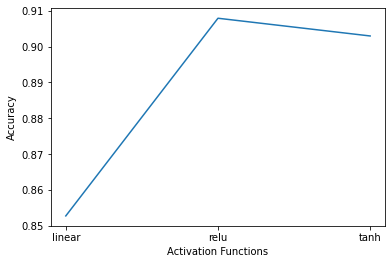

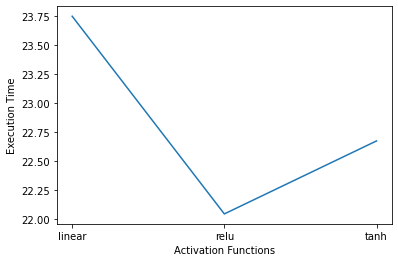

In [118]:
plt.xlabel('Activation Functions')
plt.ylabel('Accuracy')
plt.plot(Act_list,accuracy)
plt.show()

plt.xlabel('Activation Functions')
plt.ylabel('Execution Time')
plt.plot(Act_list,extime)
plt.show()

# Finding best # of layers

In [123]:
def Model():
    model = keras.Sequential(
        [
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(1, activation="sigmoid",name="outputlayer"),

        ]
    )
    
    return model

In [127]:


start_time = time.time()
model = Model()


model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=0)

y_pred = model.predict(X_test)
y_pred=(y_pred>0.5) #if >0.5 y_pred=1 else 0

accuracy.append(accuracy_score(Y_test,y_pred))

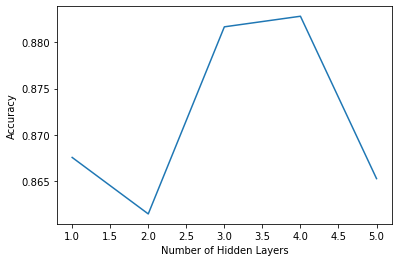

In [130]:
dl=list(range(1,6))
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.plot(dl,accuracy)
plt.show()

# Finding best # Neurons in each hidden layer

In [131]:
def Model(n):
    
    model = keras.Sequential(
        [
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(1, activation="sigmoid",name="outputlayer"),

        ]
    )
    
    return model

In [152]:
n_list = [2,6,8,12,15]
accuracy =[]
extime=[]
for n in n_list:
    start_time = time.time()
    
    model = Model(n)
    
    model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred=(y_pred>0.5) #if >0.5 y_pred=1 else 0
    extime.append((time.time() - start_time))
    accuracy.append(accuracy_score(Y_test,y_pred))

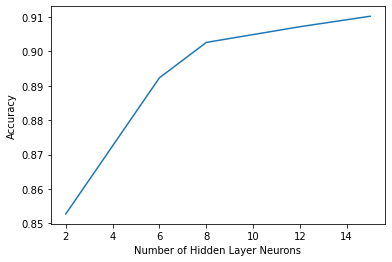

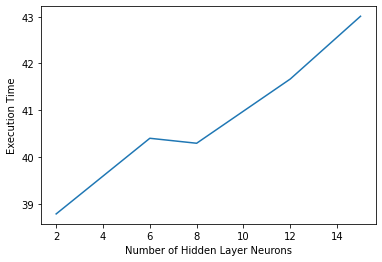

In [153]:
plt.xlabel('Number of Hidden Layer Neurons')
plt.ylabel('Accuracy')
plt.plot(n_list,accuracy)
plt.show()

plt.xlabel('Number of Hidden Layer Neurons')
plt.ylabel('Execution Time')
plt.plot(n_list,extime)
plt.show()

# Finding best optimizer

In [154]:
def Model():
    
    model = keras.Sequential(
        [
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(1, activation="sigmoid",name="outputlayer"),

        ]
    )
    
    return model

In [166]:
optimizers = ['adam','sgd','adamax','rmsprop']
accuracy =[]
extime=[]
for opt in optimizers:
    start_time = time.time()
    
    model = Model()
    
    model.compile(optimizer=opt ,loss='binary_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred=(y_pred>0.5) #if >0.5 y_pred=1 else 0
    extime.append((time.time() - start_time))
    accuracy.append(accuracy_score(Y_test,y_pred))

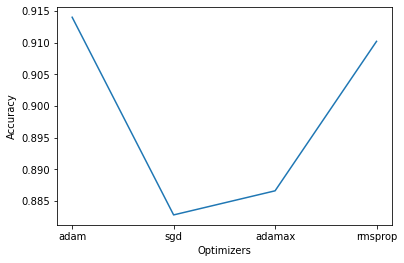

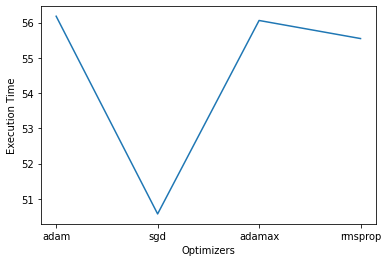

In [167]:
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.plot(optimizers,accuracy)
plt.show()

plt.xlabel('Optimizers')
plt.ylabel('Execution Time')
plt.plot(optimizers,extime)
plt.show()

# Best Epochs

In [168]:
Epochs = [10,25,50,100,150]
accuracy =[]
extime=[]
for e in Epochs:
    start_time = time.time()
    
    model = Model()
    
    model.compile(optimizer="adam" ,loss='binary_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,Y_train,batch_size=32,epochs=e,verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred=(y_pred>0.5) #if >0.5 y_pred=1 else 0
    extime.append((time.time() - start_time))
    accuracy.append(accuracy_score(Y_test,y_pred))

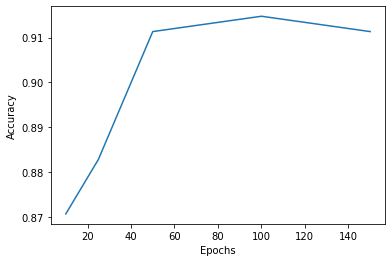

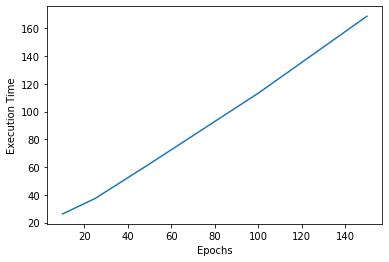

In [169]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(Epochs,accuracy)
plt.show()

plt.xlabel('Epochs')
plt.ylabel('Execution Time')
plt.plot(Epochs,extime)
plt.show()

# Best Batch Size with Epochs = 100

In [170]:
Batch_size = [32,64,128,256]
accuracy =[]
extime=[]
for b in Batch_size:
    start_time = time.time()
    
    model = Model()
    
    model.compile(optimizer="adam" ,loss='binary_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,Y_train,batch_size=b,epochs=100,verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred=(y_pred>0.5) #if >0.5 y_pred=1 else 0
    extime.append((time.time() - start_time))
    accuracy.append(accuracy_score(Y_test,y_pred))

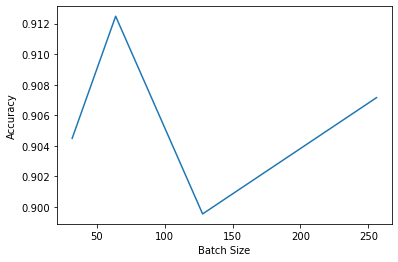

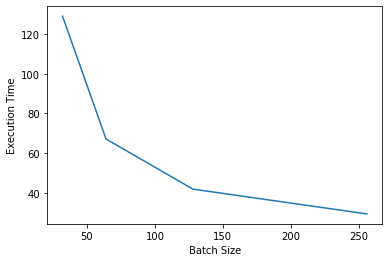

In [171]:
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.plot(Batch_size,accuracy)
plt.show()

plt.xlabel('Batch Size')
plt.ylabel('Execution Time')
plt.plot(Batch_size,extime)
plt.show()

# Best Model

In [241]:
model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", name="hiddenlayer1"),
        layers.Dense(12, activation="relu", name="hiddenlayer1"),
        layers.Dense(12, activation="relu", name="hiddenlayer1"),
        layers.Dense(12, activation="relu", name="hiddenlayer1"),
        layers.Dense(1, activation="sigmoid",name="outputlayer"),

    ]
)  

start_time = time.time()

model.compile(optimizer="adam" ,loss='binary_crossentropy' ,metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=64,epochs=100,verbose=0)




In [242]:
y_pred = model.predict(X_test)
y_pred=(y_pred>0.4) #if >0.5 y_pred=1 else 0
print("Time: ",(time.time() - start_time))
print("Accuracy: ",accuracy_score(Y_test,y_pred))

#Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print("\nConfusion Matrix")
print(cm)

Time:  96.75039100646973
Accuracy:  0.9136225266362252

Confusion Matrix
[[1222  119]
 [ 108 1179]]


# Cross Validation

In [199]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [232]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [244]:
accuracy=[]
extime=[]
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_t[train_index], X_t[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    model= Model()
    model.fit(X_train,y_train,batch_size=64,epochs=100,verbose=0)
    y_pred = model.predict(X_test)
    y_pred=(y_pred>0.4) #if >0.5 y_pred=1 else 0
    print("Time: ",(time.time() - start_time))
    extime.append((time.time() - start_time))
    print(accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))

Time:  3489.463783979416
0.9246575342465754
Time:  3611.7574491500854
0.9771689497716894
Time:  3737.1831319332123
0.839041095890411
Time:  3863.5518097877502
0.8584474885844748
Time:  3981.9665820598602
0.8755707762557078
Time:  4099.793598175049
0.9052511415525114
Time:  4217.13250207901
0.9029680365296804
Time:  4335.843667984009
0.8926940639269406
Time:  4455.726064920425
0.9200913242009132
Time:  4574.948231935501
0.9052511415525114


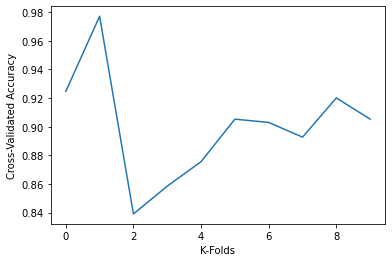

In [272]:
accuracy=[0.9246575342465754,0.9771689497716894,0.839041095890411,0.8584474885844748,0.8755707762557078,0.9052511415525114,0.9029680365296804,0.8926940639269406,0.9200913242009132
        ,0.9052511415525114]
plt.plot(accuracy)
plt.xlabel('K-Folds')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [273]:
sum(accuracy)/len(accuracy)

0.9001141552511415

In [234]:
def Model():
    model = keras.Sequential(
        [
            layers.Dense(12, activation="relu", name="hiddenlayer1"),
            layers.Dense(12, activation="relu", name="hiddenlayer1"),
            layers.Dense(12, activation="relu", name="hiddenlayer1"),
            layers.Dense(12, activation="relu", name="hiddenlayer1"),
            layers.Dense(1, activation="sigmoid",name="outputlayer"),

        ]
    )
    
    model.compile(optimizer="adam" ,loss='binary_crossentropy' ,metrics=['accuracy'])
    
    return model

# K-NN Model

In [179]:
#Implemeting K-NN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) #minkowski and p=2 means we are using eucledian distance
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [180]:
#Predicting for test data
y_pred = classifier.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[1228  113]
 [ 182 1105]]


0.8877473363774734

# Best Distance Metric

In [182]:
pvalue =[1,2,3]
accuracy = []
for pval in pvalue:
    classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=pval) 
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy.append(accuracy_score(Y_test,y_pred))
    


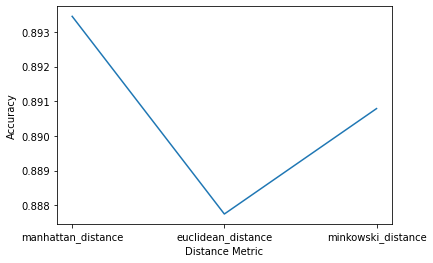

In [184]:
distance = ['manhattan_distance','euclidean_distance','minkowski_distance']
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.plot(distance,accuracy)
plt.show()

# Best N

In [256]:
nvalue =range(1,31)
accuracy = []
for n in nvalue:
    classifier = KNeighborsClassifier(n_neighbors=n,metric='minkowski',p=1) 
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy.append(accuracy_score(Y_test,y_pred))

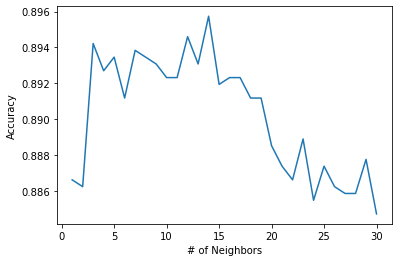

In [257]:
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.plot(nvalue,accuracy)
plt.show()

# Best Model

In [264]:
classifier = KNeighborsClassifier(n_neighbors=14,metric='minkowski',p=1) 
classifier.fit(X_train,Y_train)
    
y_pred = classifier.predict(X_test)
    



print("Accuracy:",accuracy_score(Y_test,y_pred))
#Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print("\nConfusion Matrix")
print(cm)

Accuracy: 0.895738203957382

Confusion Matrix
[[1257   84]
 [ 190 1097]]


# Cross Validation

In [265]:
#Feature Scaling
# Applying Feature Scaling for Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_t = sc.fit_transform(X) #applying on all features

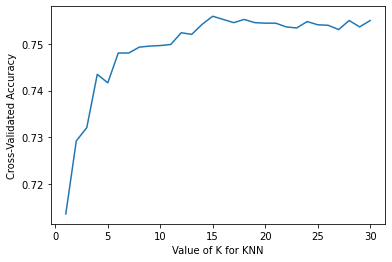

In [266]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1)
    scores = cross_val_score(knn, X_t, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [280]:
k_scores[14]

0.7559360730593607